<a href="https://colab.research.google.com/github/waleedsf/Google-Store-Apps/blob/main/Play_store_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center> Project:- Analyzing Google Play Store Apps
</center>



## Introduction
> This data is web scraped data of 10k Play Store apps around Aug 2018 for analysing the Android market, i will be performing some analysis and visualizations for answering relevant questions.

>The data can be found here [data](https://www.kaggle.com/datasets/lava18/google-play-store-apps?select=googleplaystore.csv)

## Business Understanding

1. What are the apps categories available in the store?
2. what are highest categorie gets downloaded and ratings?
3. Are people tend to review more within the years?
4. Does the apps getting more sizes within the years?



> ## Data Understanding

Each app (row) has the following values:

- App : App name
- Category : Category the app belongs to
- Rating : Overall user rating of the app (as when scraped)
- Reviews : Number of user reviews for the app (as when scraped)
- Size : Size of the app (as when scraped)
- Installs : Number of user downloads/installs for the app (as when scraped)
- Type : Paid or Free
- Price : Price of the app (as when scraped)
- Content Rating : Age group the app is targeted at - Children / Mature 21+ / Adult
- Genres:An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

In [ ]:
df = pd.read_csv("googleplaystore.csv")
df.sample(5)



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8131,CZ File Manager,TOOLS,2.2,876,8.7M,"1,000,000+",Free,0,Everyone,Tools,"August 6, 2018",3.2.3,4.2 and up
6458,bm Wallet,FINANCE,3.5,196,27M,"10,000+",Free,0,Everyone,Finance,"August 20, 2017",1.8,4.1 and up
3488,"My Airtel-Online Recharge, Pay Bill, Wallet, UPI",PRODUCTIVITY,4.3,1498393,14M,"50,000,000+",Free,0,Everyone,Productivity,"August 2, 2018",4.3.2.0,4.2 and up
7090,CA Clarity Mobile Time Manager,BUSINESS,3.1,104,5.3M,"10,000+",Free,0,Everyone,Business,"May 14, 2015",2.0,2.2 and up
10434,Talking Husky Dog,FAMILY,4.4,26545,40M,"1,000,000+",Free,0,Everyone,Casual,"July 20, 2018",2.08,4.1 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


> ## Data Preparation

In [ ]:
#Check for missing values
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# Check if there is duplicate data
df.duplicated().sum()

483

In [ ]:
df.drop_duplicates().sample()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10088,EY India CFO Insights,BUSINESS,4.7,37,10M,"5,000+",Free,0,Everyone,Business,"June 29, 2018",1.5,4.1 and up


In [ ]:
# Check the sample app name to make sure
df.query("App == 'Picai - Smart AI Camera'")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5202,Picai - Smart AI Camera,PHOTOGRAPHY,4.0,529,Varies with device,"100,000+",Free,0,Everyone,Photography,"July 17, 2018",1.2.3,6.0 and up


#### This app is considered a duplicate where there is only 1 app with this name.


In [ ]:
# Trying a different app
df.query("App == 'Motorola FM Radio'")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3670,Motorola FM Radio,VIDEO_PLAYERS,3.9,54807,Varies with device,"100,000,000+",Free,0,Everyone,Video Players & Editors,"May 2, 2018",Varies with device,Varies with device
10647,Motorola FM Radio,VIDEO_PLAYERS,3.9,54815,Varies with device,"100,000,000+",Free,0,Everyone,Video Players & Editors,"May 2, 2018",Varies with device,Varies with device


Interesting, This app has 2 rows with similar values except the [Reviews] column.


In [ ]:
df['Category'].unique()


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
df['Size'].value_counts()


Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: Size, Length: 462, dtype: int64

In [ ]:
df['Installs'].value_counts().nlargest(5)


1,000,000+     1579
10,000,000+    1252
100,000+       1169
10,000+        1054
1,000+          907
Name: Installs, dtype: int64

#### Data Quality issues:

- There is missing values in the data.
- [Rating , Reviews , Last updated] columns has the wrong type.
- There some apps (rows) that seems to be duplicate, but some values in some columns are different.
- Convert [ Size ] column to mb.
- [Size , price] columns has some characters in their values.


#### Data Cleansing

- All apps which has missing values in Ratings will be removed.
- Remove duplicate apps that has the same name.
- Fix the types of [Rating , Reviews] columns from object to int.
- Remove columns that are not needed.

In [ ]:
# Drop rows with missing values
df.dropna(subset=['Rating' , 'Content Rating'] , inplace=True)

# Test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [ ]:
#Remove duplicate apps that has the same name
df.drop_duplicates(subset='App' , inplace=True)

# Test
df.shape

(8196, 13)

#### Fix [Size] column

In [ ]:
# Upper case all [Size] column

df["Size_app"] = df["Size"].apply(lambda x : x.upper())
df["Size"] = df["Size_app"].apply(lambda x : x.upper())



In [ ]:
# Replace [K , M ] with empty string , and [VARIES WITH DEVICE] with nulls

df['Size_app'] = df['Size'].str.replace('K', '').str.replace('M', '').replace('VARIES WITH DEVICE',np.nan)

In [ ]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_app
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [ ]:
# Convert [Size_app] to numerical
df['Size_app'] = pd.to_numeric(df['Size_app'])

# divide the Kilobytes by 1000 to convert it mb
df['Size_app'] = np.where(df['Size'].str.contains('K'), df['Size_app'] / 1000, df['Size_app'])


In [ ]:
df.sample(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_app
3155,TravelPirates,TRAVEL_AND_LOCAL,4.8,43054,VARIES WITH DEVICE,"1,000,000+",Free,0,Everyone,Travel & Local,"August 6, 2018",Varies with device,Varies with device,NaN
3595,Kids Craft Ideas,PARENTING,4.1,99,6.6M,"10,000+",Free,0,Everyone,Parenting,"March 29, 2018",1.1,4.1 and up,6.6
6027,BD Online Passport Application,FAMILY,4.6,12,2.4M,"5,000+",Free,0,Everyone,Education,"October 7, 2017",3.0,4.0.3 and up,2.4
9752,Super Doctor 1-Pregnant Mom ER Surgery Simulator,FAMILY,4.1,290,73M,"10,000+",Free,0,Teen,Role Playing,"May 23, 2018",1.0,4.3 and up,73.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   object 
 4   Size            8196 non-null   object 
 5   Installs        8196 non-null   object 
 6   Type            8196 non-null   object 
 7   Price           8196 non-null   object 
 8   Content Rating  8196 non-null   object 
 9   Genres          8196 non-null   object 
 10  Last Updated    8196 non-null   object 
 11  Current Ver     8192 non-null   object 
 12  Android Ver     8194 non-null   object 
 13  Size_app        7027 non-null   float64
dtypes: float64(2), object(12)
memory usage: 960.5+ KB


#### There are more then 1000 app have varies with device size  

In [ ]:
# keeps the apps which has one specific size

df_2 = df.query("Size_app != 'Nan'")


#### Fix [Price] column

In [ ]:
# Replace [ $ ] with empty string

df_2['Price'] = df['Price'].str.replace("$", ' ')


/var/folders/8p/sdjj88mn6m77hn6jntcc8fkw0000gn/T/ipykernel_6696/2976052092.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_2['Price'] = df['Price'].str.replace("$", ' ')


In [ ]:
# Convert [Price] to numerical

df_2['Price'] = pd.to_numeric(df_2['Price'])


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   object 
 4   Size            8196 non-null   object 
 5   Installs        8196 non-null   object 
 6   Type            8196 non-null   object 
 7   Price           8196 non-null   float64
 8   Content Rating  8196 non-null   object 
 9   Genres          8196 non-null   object 
 10  Last Updated    8196 non-null   object 
 11  Current Ver     8192 non-null   object 
 12  Android Ver     8194 non-null   object 
 13  Size_app        7027 non-null   float64
dtypes: float64(3), object(11)
memory usage: 960.5+ KB


In [ ]:
col = ["Android Ver" , "Current Ver" , "Size"]

df_2 = df_2.drop(col , axis=1 )

In [ ]:
df_2["Reviews"] = df_2["Reviews"].astype(float)

#### Fix [Last updated ] column

In [ ]:
df_2["Last Updated"]=pd.to_datetime(df["Last Updated"])

# Create a [year] column
df_2['year'] =pd.DatetimeIndex(df_2["Last Updated"]).year

#### Fix [Installs] column

In [ ]:
df_2["Installs"] = df_2["Installs"].str.replace('+', '').str.replace(',', '')

df_2["Installs"] = pd.to_numeric(df_2["Installs"])


df_2.sample()

/var/folders/8p/sdjj88mn6m77hn6jntcc8fkw0000gn/T/ipykernel_6696/790675551.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_2["Installs"] = df_2["Installs"].str.replace('+', '').str.replace(',', '')


,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Size_app,year
8904,Caller ID & Call Block - DU Caller,COMMUNICATION,4.6,93930.0,5000000,Free,0.0,Everyone,Communication,2018-08-01,14.0,2018


In [ ]:
df_clean = df_2

In [ ]:
df_clean.describe()

,Rating,Reviews,Installs,Price,Size_app,year
count,8196.000000,8.196000e+03,8.196000e+03,8196.000000,7027.000000,8196.000000
mean,4.173243,2.552515e+05,9.165090e+06,1.037884,21.754427,2017.358956
std,0.536625,1.985594e+06,5.825087e+07,16.857882,22.726503,1.146922
min,1.000000,1.000000e+00,1.000000e+00,0.000000,0.008500,2010.000000
25%,4.000000,1.260000e+02,1.000000e+04,0.000000,4.900000,2017.000000
50%,4.300000,3.004000e+03,1.000000e+05,0.000000,13.000000,2018.000000
75%,4.500000,4.381300e+04,1.000000e+06,0.000000,31.000000,2018.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,100.000000,2018.000000


> ## Evaluating Results

## Apps category distribution

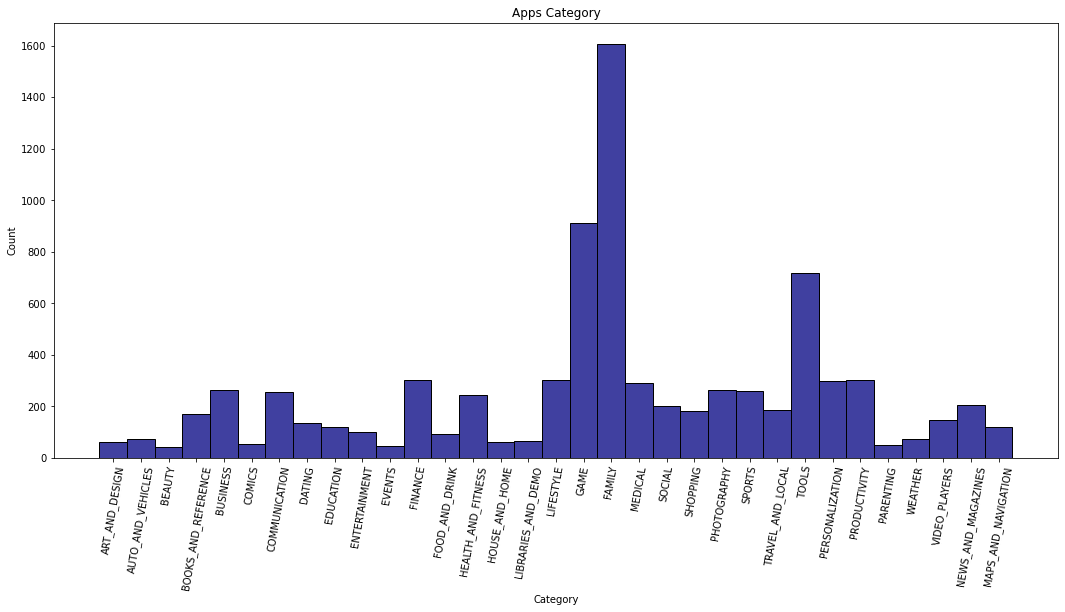

In [ ]:
# Apps Category


plt.figure(figsize=(18, 8))

fig = sns.histplot(x=df_clean['Category'], color='navy')

plt.title("Apps Category")
plt.xticks(rotation=80 )

plt.show()

> #### Family apps are the most categorized and game seconds.

## What is the most category get installs?

Text(0.5, 1.0, 'Pie chart to view apps categories that get most installs')

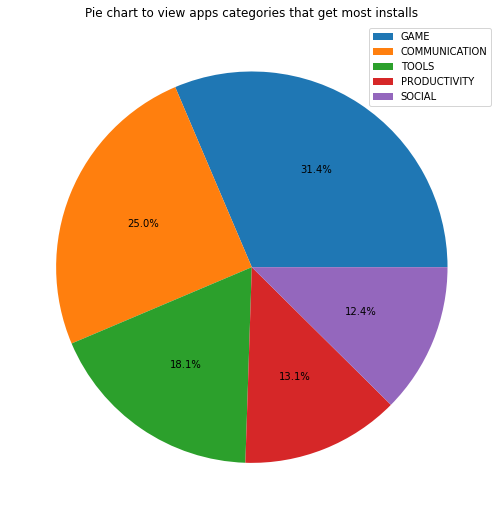

In [ ]:


fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))

df_catInst = df_clean.groupby("Category")["Installs"].sum().nlargest(5)

plot_pie(df_catInst , "best")

plt.title("Pie chart to view apps categories that get most installs"  )



> #### Games and communication categories are the most to get installs

## What Category recived the most ratings?

/Users/alwaleedalattas/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


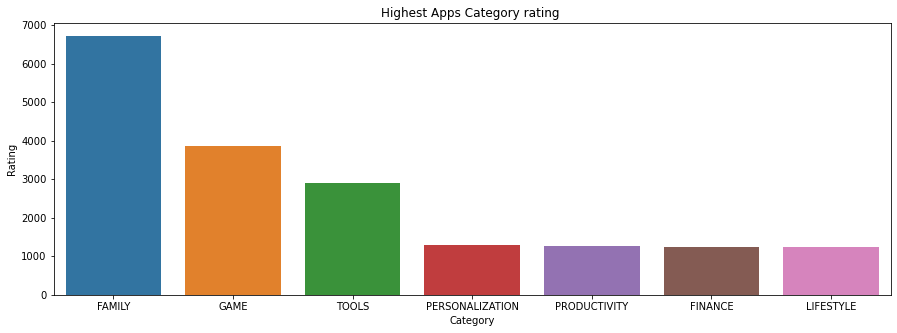

In [ ]:
df_rating_group = df_clean.groupby("Category")["Rating"].sum().nlargest(7)


plt.figure(figsize=(15,5))

sns.barplot(df_rating_group.index , df_rating_group )

plt.ylabel("Rating")
plt.xlabel("Category")
plt.title("Highest Apps Category rating ")


plt.show()

> #### Family apps are most regards the rating, although communication apps are the second highest category to get installs, they seems to not get high ratings.

## Are people tend to review more within the years?

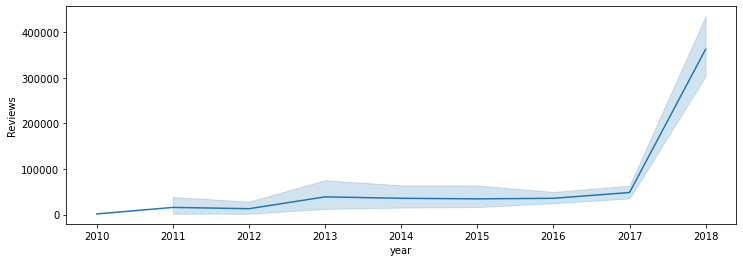

In [ ]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df_clean, x=df_clean["year"], y='Reviews');

>#### Reviews have incresed massively in 2017 and seems to keep increasing within the years

## Find the relation between app size and year

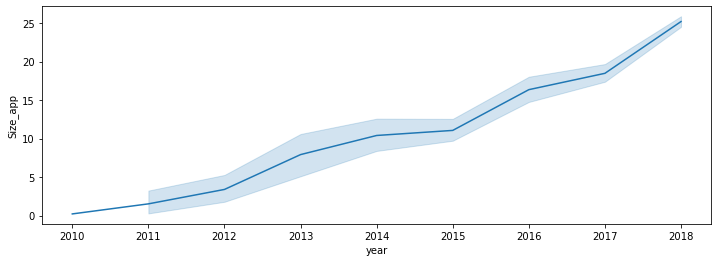

In [ ]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df_clean, x=df_clean["year"], y='Size_app');

> #### As the graph shows, apps sizes is getting bigger every year

#### There is no data modelling as I am not using any machine learning methods for the questions I need to answer